In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium import plugins
%matplotlib inline
crime=pd.read_csv("Sep2020.csv")
crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,b9d3e45f20bb3918c91f09030e40b5f1b4b31b733e8cf3...,2020-09,South Wales Police,South Wales Police,-3.247519,51.774366,On or near Ty Bryn,W01001481,Blaenau Gwent 006E,Violence and sexual offences,Under investigation,NaN
1,d9a109ab06645259fdeb46fddfb392aba3a2fb4d5cb589...,2020-09,South Wales Police,South Wales Police,-2.371702,53.548490,On or near Derby Road,E01004910,Bolton 034G,Violence and sexual offences,Under investigation,NaN
2,NaN,2020-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-09,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-09,South Wales Police,South Wales Police,-3.658207,51.633158,On or near Woodlands Terrace,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12429 entries, 0 to 12428
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               9119 non-null   object 
 1   Month                  12429 non-null  object 
 2   Reported by            12429 non-null  object 
 3   Falls within           12429 non-null  object 
 4   Longitude              12173 non-null  float64
 5   Latitude               12173 non-null  float64
 6   Location               12429 non-null  object 
 7   LSOA code              12173 non-null  object 
 8   LSOA name              12173 non-null  object 
 9   Crime type             12429 non-null  object 
 10  Last outcome category  9119 non-null   object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [15]:
crime1 = crime.iloc[:,[1,4,5,9]]
crime1.info()
# remove NA's
crime1 = crime1[crime1['Longitude'].notna()] #remove na's
crime1 = crime1[crime1['Latitude'].notna()] # remove na's
crime1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12429 entries, 0 to 12428
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       12429 non-null  object 
 1   Longitude   12173 non-null  float64
 2   Latitude    12173 non-null  float64
 3   Crime type  12429 non-null  object 
dtypes: float64(2), object(2)
memory usage: 388.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12173 entries, 0 to 12172
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       12173 non-null  object 
 1   Longitude   12173 non-null  float64
 2   Latitude    12173 non-null  float64
 3   Crime type  12173 non-null  object 
dtypes: float64(2), object(2)
memory usage: 475.5+ KB


In [17]:
# Remove Null from Longitude & Latitude
crime1.dropna(inplace=True)
#print(crime1)
crime1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12173 entries, 0 to 12172
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       12173 non-null  object 
 1   Longitude   12173 non-null  float64
 2   Latitude    12173 non-null  float64
 3   Crime type  12173 non-null  object 
dtypes: float64(2), object(2)
memory usage: 475.5+ KB


In [8]:
count1 = dict(crime1["Crime type"].value_counts())
count1

{'Violence and sexual offences': 3501,
 'Anti-social behaviour': 3224,
 'Public order': 1303,
 'Criminal damage and arson': 1002,
 'Vehicle crime': 682,
 'Other theft': 587,
 'Shoplifting': 539,
 'Burglary': 410,
 'Drugs': 409,
 'Other crime': 178,
 'Bicycle theft': 170,
 'Theft from the person': 68,
 'Possession of weapons': 58,
 'Robbery': 42}

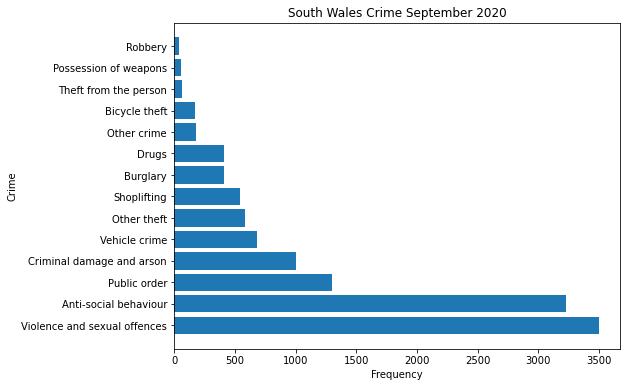

In [9]:
# plot
x = list(count1.keys())
y = list(count1.values())
plt.figure(figsize = (8, 6))
plt.barh(x,y)
plt.title(label = 'South Wales Crime September 2020')
plt.ylabel('Crime')
plt.xlabel('Frequency')
plt.show()

In [10]:
crime_area = list(zip(crime1.Latitude, crime1.Longitude))
def generateBaseMap(default_location=[51.8, -3.5], default_zoom_start=9):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    heatmap = plugins.HeatMap(crime_area, radius=5, blur=2)
    base_map.add_child(heatmap)
    return base_map
generateBaseMap()
